# ORFEUS Webinar

Date: 19th of June 2024

Topic: EIDAWS-WFCatalog and the FDSNWS-Availability.

## Agenda

1. EIDAWS-WFCatalog recap
1. FDSNWS-Availability introduction
1. Example workflow using FDSNWS-Availability
1. FDSNWS-Availability client demo

## EIDAWS-WFCatalog recap

EIDAWS-WFCatalog provides **detailed information on the contents of waveform data** including quality control parameters.

Information can be included on:

- Sample metrics
- Record header flags
- Timing quality

Refer to [orfeus-eu.org/data/eida/webservices/wfcatalog](https://orfeus-eu.org/data/eida/webservices/wfcatalog/) for detailed information.

EIDAWS-WFCatalog can serve as an index for data discovery as it has support for range filtering on all available metrics:

- Quadratic mean
- Standard deviation
- Minimum
- Maximum
- Availability
- Gaps
- Sum of gaps
- Overlaps
- Sum of overlaps
- Median
- Mean
- Lower quartile
- Upper quartile

Example (`NL.HGN.02.BHZ.D.2024.001`)

URL: [orfeus-eu.org/eidaws/wfcatalog/1/query?network=NL&station=HGN&channel=BHZ&start=2024-01-01&end=2024-01-02&include=all](https://orfeus-eu.org/eidaws/wfcatalog/1/query?network=NL&station=HGN&channel=BHZ&start=2024-01-01&end=2024-01-02&include=all)

Response:
```json
[
    {
        "version": "1.0.0",
        "producer": {
            "name": "ORFEUS ODC/KNMI",
            "agent": "ObsPy mSEED-QC",
            "created": "2024-01-08T05:59:13.395Z"
        },
        "station": "HGN",
        "network": "NL",
        "location": "02",
        "channel": "BHZ",
        "num_gaps": 1,
        "num_overlaps": 0,
        "sum_gaps": 1.819538,
        "sum_overlaps": 0,
        "max_gap": 1.819538,
        "max_overlap": null,
        "record_length": [
            512
        ],
        "sample_rate": [
            40
        ],
        "percent_availability": 99.99789405324074,
        "encoding": [
            "STEIM2"
        ],
        "num_records": 9476,
        "start_time": "2024-01-01T00:00:00.000Z",
        "end_time": "2024-01-02T00:00:00.000Z",
        "format": "miniSEED",
        "quality": "D",
        "sample_min": -542404,
        "sample_max": 516487,
        "sample_mean": 682.47420721728,
        "sample_median": 655,
        "sample_stdev": 22389.627479927443,
        "sample_rms": 22400.02655653422,
        "sample_lower_quartile": -798,
        "sample_upper_quartile": 2112,
        "miniseed_header_percentages": {
            "timing_quality_mean": 99.93035035880118,
            "timing_quality_median": 100,
            "timing_quality_lower_quartile": 100,
            "timing_quality_upper_quartile": 100,
            "timing_quality_min": 80,
            "timing_quality_max": 100,
            "timing_correction": 0,
            "io_and_clock_flags": {
                "short_record_read": 0,
                "station_volume": 0,
                "start_time_series": 0,
                "end_time_series": 0,
                "clock_locked": 99.99789405310595
            },
            "data_quality_flags": {
                "amplifier_saturation": 0,
                "digitizer_clipping": 0,
                "spikes": 0,
                "glitches": 0,
                "missing_padded_data": 0,
                "telemetry_sync_error": 0,
                "digital_filter_charging": 0,
                "suspect_time_tag": 0
            },
            "activity_flags": {
                "calibration_signal": 0,
                "time_correction_applied": 0,
                "event_begin": 0.5072337940887168,
                "event_end": 0,
                "positive_leap": 0,
                "negative_leap": 0
            }
        }
    }
]
```

EIDAWS-WFCatalog is using ObsPy's `MSEEDMetadata` at its core:

In [32]:
from obspy.signal.quality_control import MSEEDMetadata

md = MSEEDMetadata(["NL.HGN.02.BHZ.D.2024.001"])
md.meta

{'wfmetadata_id': 'smi:local/qc/5cbab271-84c9-421b-a82d-644be78b66ca',
 'producer': 'ObsPy 1.4.1',
 'waveform_type': 'seismic',
 'waveform_format': 'miniSEED',
 'version': '1.0.0',
 'start_gap': None,
 'end_gap': None,
 'num_gaps': 0,
 'sum_gaps': 0,
 'max_gap': None,
 'num_overlaps': 0,
 'sum_overlaps': 0,
 'max_overlap': None,
 'network': 'NL',
 'station': 'HGN',
 'location': '02',
 'channel': 'BHZ',
 'quality': 'D',
 'first_sample': 2023-12-31T23:59:52.894538Z,
 'last_sample': 2024-01-02T00:00:01.069538Z,
 'seed_id': 'NL.HGN.02.BHZ',
 'files': ['NL.HGN.02.BHZ.D.2024.001'],
 'start_time': 2023-12-31T23:59:52.894538Z,
 'end_time': 2024-01-02T00:00:01.094538Z,
 'num_samples': 3456328,
 'num_records': 9477,
 'sample_rate': [40.0],
 'record_length': [512],
 'encoding': ['STEIM2'],
 'sample_min': -542404,
 'sample_max': 516487,
 'sample_mean': 682.3789802356721,
 'sample_median': 655.0,
 'sample_lower_quartile': -798.0,
 'sample_upper_quartile': 2112.0,
 'sample_rms': 22398.745803875572,


## FDSNWS-Availability introduction

Definition from [fdsnws-availability-1.0.pdf](https://fdsn.org/webservices/fdsnws-availability-1.0.pdf):

> web service interface for the exchange of time series data availability

Exposes following methods:

- `/query` (full resolution time series listings with an option to merge overlapping time spans)
- `/queryauth` (optional, same as `/query`, but authenticated)
- `/extent` (time series listings with only the earliest and latest data available)
- `/extentauth` (optional, same as `/extent`, but authenticated)
- `/version`

Allows:
- Querying availability information using SEED identifiers and timespans
- Merging on `quality` and `samplerate`
- Adjusting output using `format`, `includerestricted` and `limit` parameters
- Sorting rows using `orderby` parameter (SEED IDs, `latestupdate`, `latestupdate_desc`)
- Merging gaps using `mergegaps` parameter (`0` by default)

For complete specification including list of available parameters, please refer to [fdsnws-availability-1.0.pdf](https://fdsn.org/webservices/fdsnws-availability-1.0.pdf).

### Example outputs



#### `/query`

URL: [orfeus-eu.org/fdsnws/availability/1/query?net=NA&start=2024-01-01](https://orfeus-eu.org/fdsnws/availability/1/query?net=NA&start=2024-01-01)

```
#Network Station Location Channel Quality SampleRate Earliest                    Latest                     
NA       SABA             BHE     D       40.0       2024-01-01T00:00:03.994000Z 2024-01-02T00:00:00.000000Z
NA       SABA             BHE     D       40.0       2024-01-02T00:00:01.944000Z 2024-01-03T00:00:00.000000Z
(...)
NA       SABN             BHE     D       40.0       2024-01-01T23:29:23.074000Z 2024-01-02T00:00:00.000000Z
NA       SABN             BHE     D       40.0       2024-01-02T00:00:22.024000Z 2024-01-02T01:58:10.824000Z
(...)
NA       SABQ             BHE     D       40.0       2024-01-01T00:00:02.199000Z 2024-01-02T00:00:00.000000Z
NA       SABQ             BHE     D       40.0       2024-01-02T00:00:00.199000Z 2024-01-03T00:00:00.000000Z
(...)
```

#### `/extent`

URL: [orfeus-eu.org/fdsnws/availability/1/extent?net=NA&start=2024-01-01](https://orfeus-eu.org/fdsnws/availability/1/extent?net=NA&start=2024-01-01)

```
#Network Station Location Channel Quality SampleRate Earliest                    Latest                      Updated              TimeSpans Restriction
NA       SABA             BHE     D       40.0       2024-01-01T00:00:03.994000Z 2024-06-16T00:00:00.000000Z 2024-06-16T07:36:02Z 19        OPEN       
NA       SABA             BHN     D       40.0       2024-01-01T00:00:04.119000Z 2024-06-16T00:00:00.000000Z 2024-06-16T07:36:38Z 19        OPEN       
(...)
NA       SABN             BHE     D       40.0       2024-01-01T23:29:23.074000Z 2024-04-09T00:00:54.575000Z 2024-04-10T07:35:27Z 5         OPEN       
NA       SABN             BHN     D       40.0       2024-01-01T23:29:04.449000Z 2024-05-19T00:01:02.500000Z 2024-05-20T07:32:01Z 5         OPEN       
(...)
NA       SABQ             BHE     D       40.0       2024-01-01T00:00:02.199000Z 2024-06-16T00:00:00.000000Z 2024-06-16T07:31:00Z 9         OPEN       
NA       SABQ             BHN     D       40.0       2024-01-01T00:00:05.674000Z 2024-06-16T00:00:00.000000Z 2024-06-16T07:31:55Z 9         OPEN       
(...)
```

Output format defaults to `text`, but data can be also requested as `geocsv` and `json`:

URL: [orfeus-eu.org/fdsnws/availability/1/query?net=NA&sta=SABA&channel=BHZ&start=2024-01-01&end=2024-01-02&format=json](https://orfeus-eu.org/fdsnws/availability/1/query?net=NA&sta=SABA&channel=BHZ&start=2024-01-01&end=2024-01-02&format=json)

```json
{
  "created": "2024-06-17T06:49:47Z",
  "version": 1,
  "datasources": [
    {
      "network": "NA",
      "station": "SABA",
      "location": "",
      "channel": "BHZ",
      "quality": "D",
      "samplerate": 40,
      "timespans": [
        [
          "2024-01-01T00:00:01.944000Z",
          "2024-01-02T00:00:00.000000Z"
        ],
        [
          "2024-01-02T00:00:04.669000Z",
          "2024-01-02T00:00:00.000000Z"
        ]
      ]
    }
  ]
}
```

## Example workflow using FDSNWS-Availability

1. Retrieve seismic event information from FDSNWS-Event catalogue offered by [GFZ](https://www.gfz-potsdam.de/) EIDA Node:
    * Date:
        * 📅 start date = 2024-01-01
        * 📅 end date = 2024-06-01
    * Event characteristics:
        * 🎚️ minimum magnitude = 2.1
    * Coordinates:
        * 🌐 minimum latitude = 52°N
        * 🌐 maximum latitude = 55°N
        * 🌐 minimum longitude = 4°E
        * 🌐 maximum longitude = 8°E
1. Using [FDSNWS-Station](https://www.orfeus-eu.org/data/eida/webservices/station/) web service, list all stations available in the region defined using epicentral distance.
1. Using [FDSNWS-Availability](https://www.orfeus-eu.org/data/eida/webservices/availability/) service exclude stations with missing data.
1. Using [FDSNWS-Dataselect](https://www.orfeus-eu.org/data/eida/webservices/dataselect/) web service, download miniSEED files containing the waveforms from a time window defined using theoretial seismic wave arrival times.

### Imports

In [33]:
import io
from datetime import timedelta

import pandas as pd
import requests
from obspy import UTCDateTime
from obspy.clients.fdsn.client import Client

### Config and global instances

In [34]:
# Define start and end dates for the event search
START = "2024-01-01"
END = "2024-06-01"

# Define event minimum magnitude and bounding box for event search
MAG_MIN = 2.1
LAT_MIN = 52
LAT_MAX = 55
LON_MIN = 4
LON_MAX = 8

# Max radius of stations from the epicenter (degrees)
RADIUS_MAX = 0.2

# FDSNWS-Availability URL
FDSNWS_AVAILABILITY_URL = "https://orfeus-eu.org/fdsnws/availability/1/query"
# Encoding for the HTTP requests
ENCODING = "utf-8"

# Use KNMI national event catalog
CLIENT_KNMI = Client("KNMI")
# Use ORFEUS Data Center for station metadata and waveform data
CLIENT_ODC = Client("ODC")

### Event catalogue

In [35]:
catalog = CLIENT_KNMI.get_events(
    starttime=START,
    endtime=END,
    minmagnitude=MAG_MIN,
    minlatitude=LAT_MIN,
    maxlatitude=LAT_MAX,
    minlongitude=LON_MIN,
    maxlongitude=LON_MAX,
)

# Get the first event from the catalog
event = catalog[0]
print(event)

# Let's see the event page...
event_id = event.resource_id.id.split("/")[-1]
print(f"Event page: https://www.knmi.nl/nederland-nu/seismologie/aardbevingen/{event_id}")

Event:	2024-03-24T01:57:06.299999Z | +52.638,   +6.850 | 2.14 MLn | manual

	            resource_id: ResourceIdentifier(id="smi:org.gfz-potsdam.de/geofon/knmi2024fvuq")
	             event_type: 'induced or triggered event'
	          creation_info: CreationInfo(agency_id='KNMI', creation_time=UTCDateTime(2024, 3, 24, 1, 57, 25, 637550))
	    preferred_origin_id: ResourceIdentifier(id="smi:org.gfz-potsdam.de/geofon/Hypocenter.20240324022356.318037.46049")
	 preferred_magnitude_id: ResourceIdentifier(id="smi:org.gfz-potsdam.de/geofon/Magnitude/20240324023127.623336.46061")
	                   ---------
	     event_descriptions: 2 Elements
	                origins: 1 Elements
	             magnitudes: 1 Elements
Event page: https://www.knmi.nl/nederland-nu/seismologie/aardbevingen/knmi2024fvuq


Plot the event:

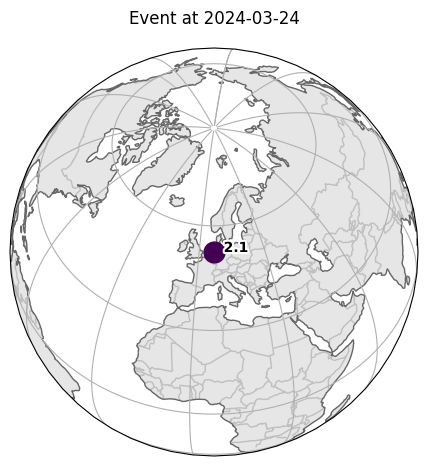

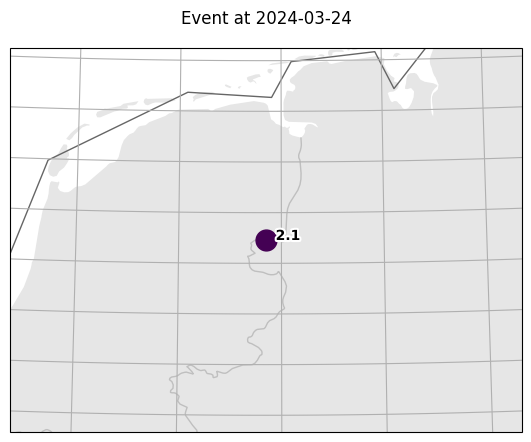

In [36]:
# Plot orthographic and local maps of the event
catalog_plot_ortho = catalog.plot(projection="ortho")
catalog_plot_local = catalog.plot(projection="local")

### Station inventory

In [37]:
inventory = CLIENT_ODC.get_stations(
    startbefore=event.origins[0].time,
    endafter=event.origins[0].time,
    latitude=event.origins[0].latitude,
    longitude=event.origins[0].longitude,
    maxradius=RADIUS_MAX,
)

print(inventory)

Inventory created at 2024-06-19T07:30:18.646414Z
	Sending institution: SeisComP (ODC)
	Contains:
		Networks (1):
			NL
		Stations (41):
			NL.COE (Coevorden)
			NL.COE2 (Coevorden - Hulteweg)
			NL.COE3 (Coevorden - Nieuwe Krim)
			NL.COE4 (Coevorden - Pampert)
			NL.HRDB (Hardenberg)
			NL.L206 (t Haantje Seismo-Acoustic Array)
			NL.L2061 (t Haantje Seismo-Acoustic Array)
			NL.L2062 (t Haantje Seismo-Acoustic Array)
			NL.L2063 (t Haantje Seismo-Acoustic Array)
			NL.L2064 (t Haantje Seismo-Acoustic Array)
			NL.L2065 (t Haantje Seismo-Acoustic Array)
			NL.L2066 (t Haantje Seismo-Acoustic Array)
			NL.L2067 (t Haantje Seismo-Acoustic Array)
			NL.L2071 (Nieuw-Dordrecht Seismo-Acoustic Array)
			NL.L2072 (Nieuw-Dordrecht Seismo-Acoustic Array)
			NL.L2073 (Nieuw-Dordrecht Seismo-Acoustic Array)
			NL.L2074 (Nieuw-Dordrecht Seismo-Acoustic Array)
			NL.L2075 (Nieuw-Dordrecht Seismo-Acoustic Array)
			NL.L2076 (Nieuw-Dordrecht Seismo-Acoustic Array)
			NL.L2077 (Nieuw-Dordrecht Seismo

Plot the inventory:

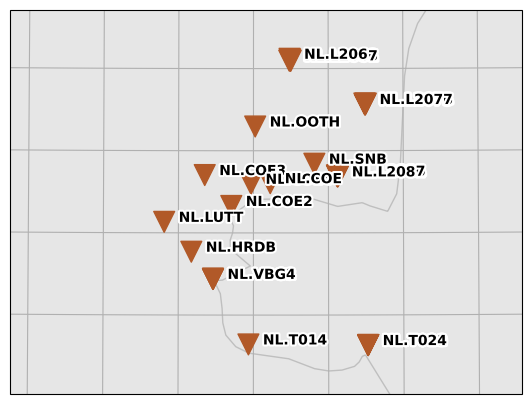

In [38]:
inventory_plot = inventory.plot(projection="local")

### Availability information

FDSNWS-Availability web service has been deployed across EIDA in late 2023. Service specifications can be found on [fdsn.org/webservices/fdsnws-availability-1.0.pdf](https://fdsn.org/webservices/fdsnws-availability-1.0.pdf).

Unfortunately, FDSNWS-Availability is not yet impmenented in ObsPy - we are going to use `requests` library to request the information.

We are goin to send a POST request to the `FDSNWS_AVAILABILITY_URL` with following body listing stations discovered in previous step:
```
NET STA LOC CHA START END
```

As a response, we are expecting list of continuous segments:
```
#Network Station Location Channel Quality SampleRate Earliest Latest
NET      STA     LOC      CHA     M       20.0       START    END
```

In [39]:
# Define window relative to the event origin time. We could calculate and
# use P-arrival time to define a more accurate window, but considering we
# are working with local events and small distances we can use a fixed window.
WINDOW_START = event.origins[0].time - timedelta(seconds=30)
WINDOW_END = event.origins[0].time + timedelta(seconds=60)

post_data = "format=geocsv\n"

# Build availability POST data
for network in inventory.networks:
    for station in network.stations:
        # We are only interested in broadband high gain data
        post_data += f"{network.code} {station.code} * HG? {WINDOW_START.isoformat()} {WINDOW_END.isoformat()}\n"

# Send availability request
availability_response = requests.post(
    FDSNWS_AVAILABILITY_URL, data=post_data.encode(ENCODING)
)

# Filter out comments from the response (lines starting with '#')
availability = "\n".join(
    [
        line
        for line in availability_response.text.split("\n")
        if not line.startswith("#")
    ]
)

Content of our request:

In [40]:
# First 10 lines of the availability request
print("\n".join(post_data.split("\n")[:10]))

format=geocsv
NL COE2 * HG? 2024-03-24T01:56:36.299999 2024-03-24T01:58:06.299999
NL COE3 * HG? 2024-03-24T01:56:36.299999 2024-03-24T01:58:06.299999
NL COE4 * HG? 2024-03-24T01:56:36.299999 2024-03-24T01:58:06.299999
NL COE * HG? 2024-03-24T01:56:36.299999 2024-03-24T01:58:06.299999
NL HRDB * HG? 2024-03-24T01:56:36.299999 2024-03-24T01:58:06.299999
NL L2061 * HG? 2024-03-24T01:56:36.299999 2024-03-24T01:58:06.299999
NL L2062 * HG? 2024-03-24T01:56:36.299999 2024-03-24T01:58:06.299999
NL L2063 * HG? 2024-03-24T01:56:36.299999 2024-03-24T01:58:06.299999
NL L2064 * HG? 2024-03-24T01:56:36.299999 2024-03-24T01:58:06.299999


Content of the response:

In [41]:
# First 10 lines of the availability response
print("\n".join(availability.split("\n")[:10]))

Network|Station|Location|Channel|Quality|SampleRate|Earliest|Latest
NL|COE2||HG1|D|200.0|2024-03-24T01:56:36.299999Z|2024-03-24T01:58:06.299999Z
NL|COE2||HG2|D|200.0|2024-03-24T01:56:36.299999Z|2024-03-24T01:58:06.299999Z
NL|COE2||HGZ|D|200.0|2024-03-24T01:56:36.299999Z|2024-03-24T01:58:06.299999Z
NL|COE3||HG1|D|200.0|2024-03-24T01:56:36.299999Z|2024-03-24T01:58:06.299999Z
NL|COE3||HG2|D|200.0|2024-03-24T01:56:36.299999Z|2024-03-24T01:58:06.299999Z
NL|COE3||HGZ|D|200.0|2024-03-24T01:56:36.299999Z|2024-03-24T01:58:06.299999Z
NL|HRDB||HG1|D|200.0|2024-03-24T01:56:36.299999Z|2024-03-24T01:58:06.299999Z
NL|HRDB||HG2|D|200.0|2024-03-24T01:56:36.299999Z|2024-03-24T01:58:06.299999Z
NL|HRDB||HGZ|D|200.0|2024-03-24T01:56:36.299999Z|2024-03-24T01:58:06.299999Z


### Process FDSNWS-Availability response

- Convert text to CSV
- Load into Pandas DataFrame
- Group on channel code
- Ensure there are 3 components for each station

In [42]:
# Load it into a pandas DataFrame
df = pd.read_csv(io.StringIO(availability), sep='|', dtype=str)

# Fill NaN values with empty strings (required for grouping)
df = df.fillna('')

# Round the 'Start' and 'End' columns to the nearest second by removing the milliseconds
df["Earliest"] = df["Earliest"].str[:19]
df["Latest"] = df["Latest"].str[:19]

# Add a column with the first two characters of the 'Channel' column for easier grouping
df["Channel_First_Two"] = df["Channel"].str[:2]

# And aggregate the data tdfo get the number of available channels per station
df = (
    df.groupby(
        ["Network", "Station", "Location", "Channel_First_Two", "Earliest", "Latest"]
    )
    .size()
    .reset_index(name="Count")
)

# Remove rows where 'Count' is less than 3
df = df[df["Count"] >= 3]

# Display the first 10 rows
df.head(10)

,Network,Station,Location,Channel_First_Two,Earliest,Latest,Count
0,NL,COE2,,HG,2024-03-24T01:56:36,2024-03-24T01:58:06,3
1,NL,COE3,,HG,2024-03-24T01:56:36,2024-03-24T01:58:06,3
2,NL,HRDB,,HG,2024-03-24T01:56:36,2024-03-24T01:58:06,3
3,NL,LUTT,,HG,2024-03-24T01:56:36,2024-03-24T01:58:06,3
4,NL,OOTH,,HG,2024-03-24T01:56:36,2024-03-24T01:58:06,3
5,NL,SNB,,HG,2024-03-24T01:56:36,2024-03-24T01:58:06,3
6,NL,T020,,HG,2024-03-24T01:56:36,2024-03-24T01:58:06,3


### Downloading and plotting the data

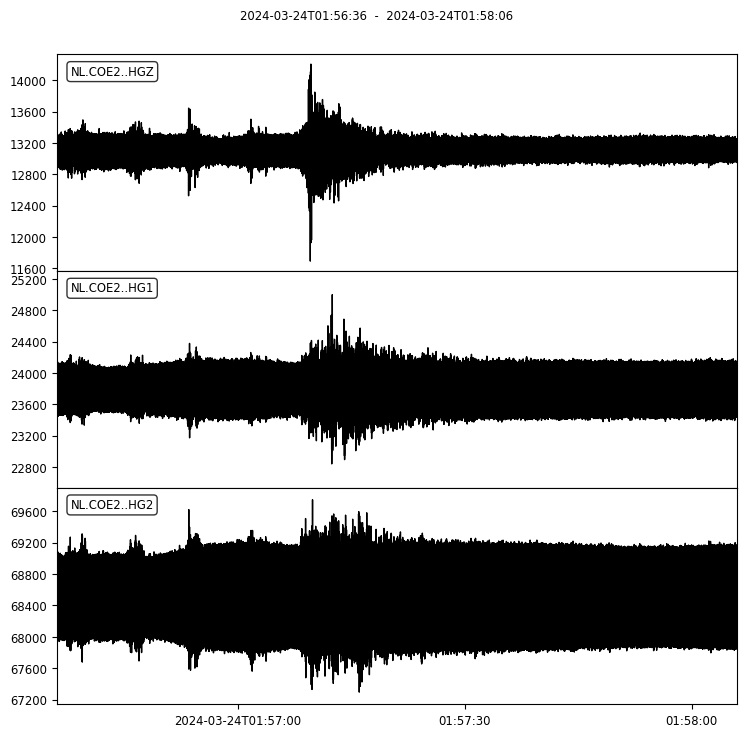

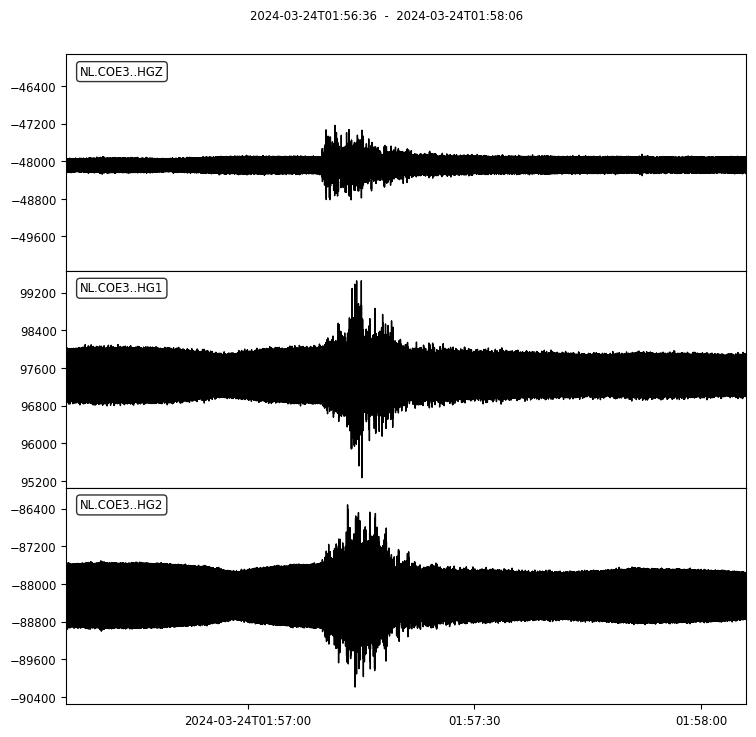

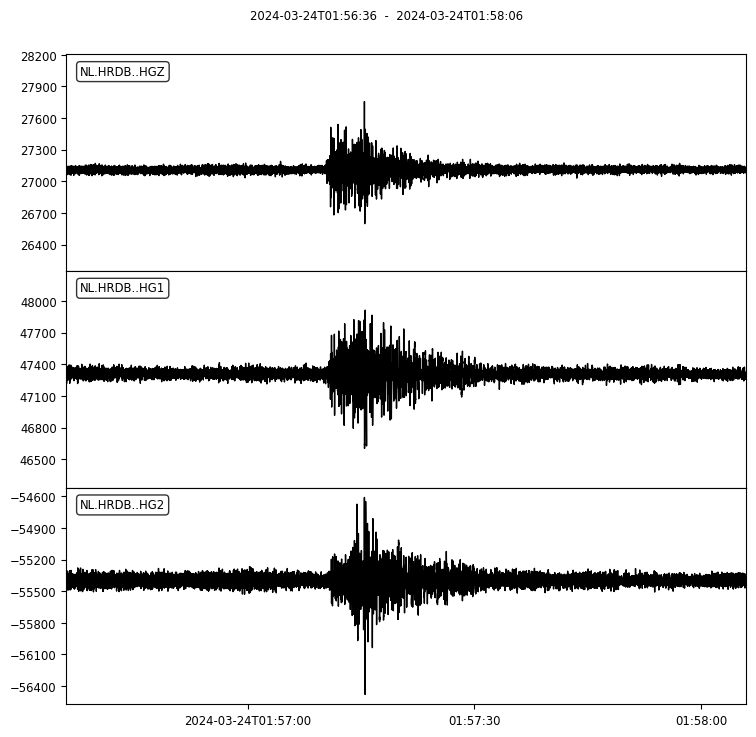

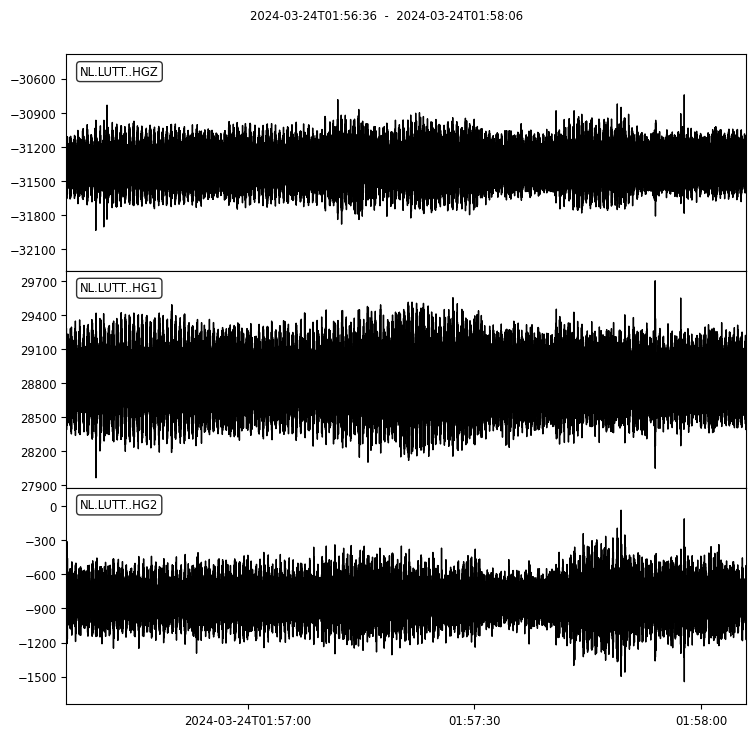

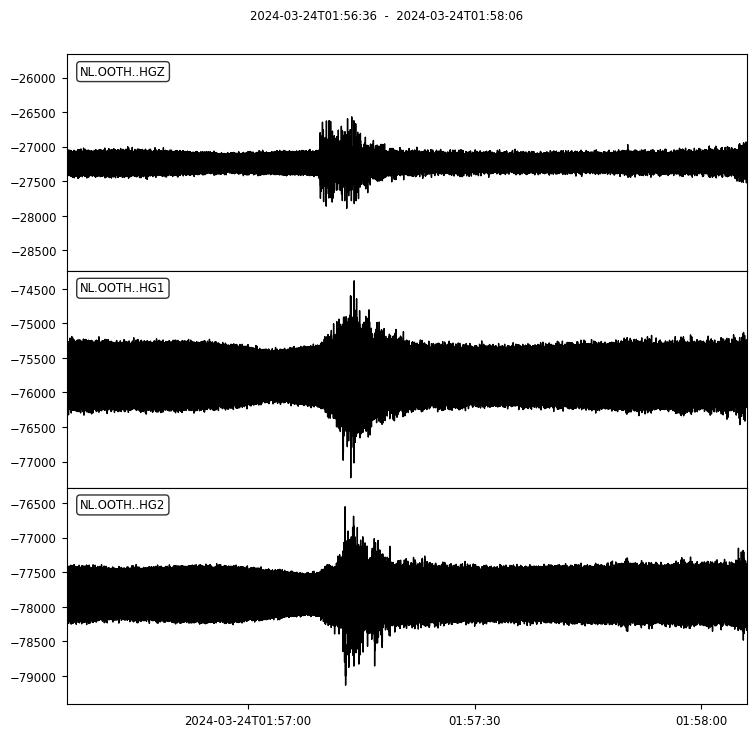

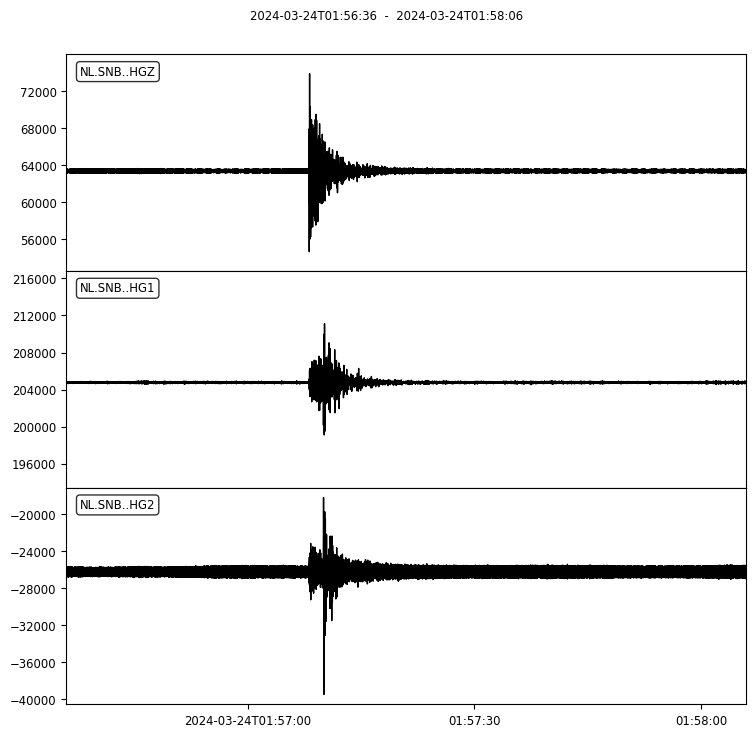

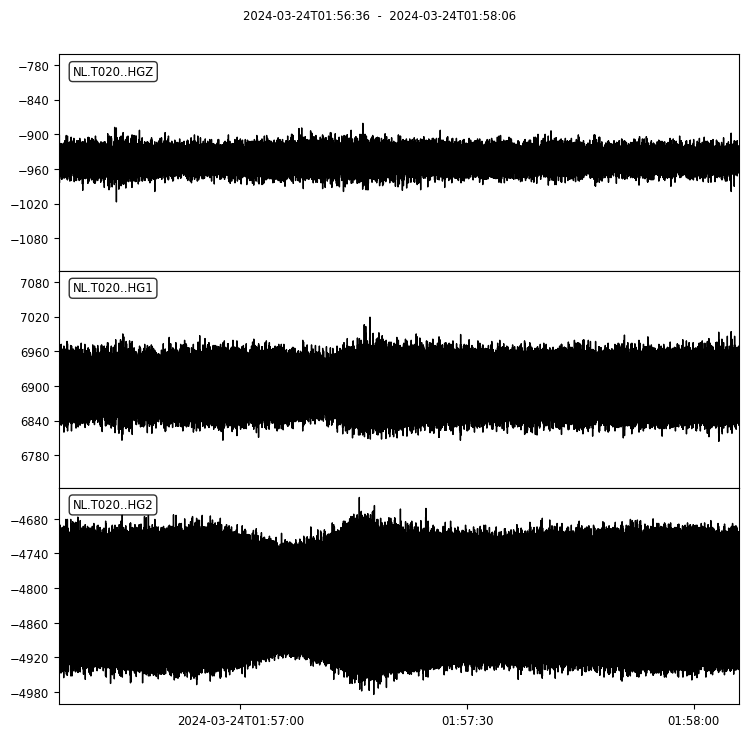

In [43]:
for idx, e in enumerate(df.itertuples()):
    if idx >= 10:
        break

    try:
        st = CLIENT_ODC.get_waveforms(
            network=e.Network,
            station=e.Station,
            location=e.Location,
            channel=e.Channel_First_Two + "?",
            starttime = UTCDateTime(e.Earliest),
            endtime = UTCDateTime(e.Latest)
        )
    except Exception as _:
        print("Something went terribly wrong.")
        continue

    st.plot()

### Final remarks

- FDSNWS-Availability repository: [github.com/EIDA/ws-availability](https://github.com/EIDA/ws-availability)
- Currently working on performance improvements

## FDSNWS-Availability client demo

Repository can be found under [github.com/EIDA/a10y](https://github.com/EIDA/a10y).